In [2]:
import os 
import time 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch 
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader


print("Torch version: ", torch.__version__)

device = ("cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu")

print(f"Device: {device}")

Torch version:  2.0.1
Device: mps


### Data Preparation

In [8]:
# data augmentation and normalization for train set
# only normalization for test set 

data_path = 'data'

transform = transforms.Compose([
        transforms.Resize((256,256)),
        transforms.ToTensor(),
    ])


train_dataset = datasets.ImageFolder(root=os.path.join(data_path, 'train'), transform=transform)

# Load the testing dataset using ImageFolder
val_dataset = datasets.ImageFolder(root=os.path.join(data_path, 'val'), transform=transform)

# Define batch size
batch_size = 32

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
test_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)



In [11]:
# Check properties of the training dataset
print(f"Number of training images: {len(train_dataset)}")
print(f"Number of training classes: {len(train_dataset.classes)}")
print("Classes in the training dataset:", train_dataset.classes)

# Check properties of the testing dataset
print(f"\nNumber of testing images: {len(val_dataset)}")
print(f"Number of testing classes: {len(val_dataset.classes)}")
print("Classes in the testing dataset:", val_dataset.classes)



Number of training images: 4443
Number of training classes: 2
Classes in the training dataset: ['buildings', 'forest']

Number of testing images: 911
Number of testing classes: 2
Classes in the testing dataset: ['buildings', 'forest']


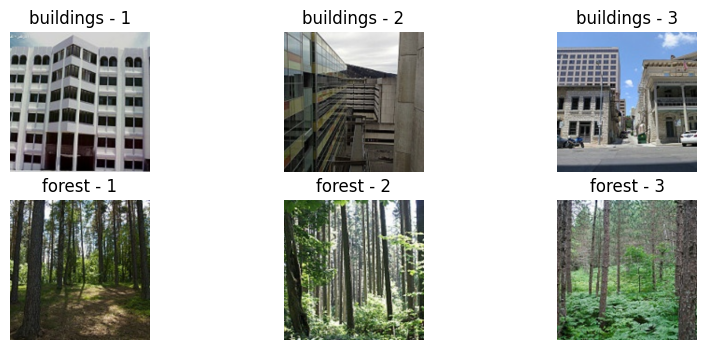

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Function to display images
def show_images(images, labels, classes):
    fig, axs = plt.subplots(len(classes), 3, figsize=(10, 2 * len(classes)))

    for i, class_name in enumerate(classes):
        class_indices = [idx for idx, label in enumerate(labels) if label == i]

        for j in range(3):
            img_index = class_indices[j]
            img = images[img_index].numpy().transpose((1, 2, 0))
            axs[i, j].imshow(img)
            axs[i, j].axis('off')
            axs[i, j].set_title(f'{class_name} - {j + 1}')

    plt.show()

# Extract a batch of data from the data loader
batch_iter = iter(train_loader)
images, labels = next(batch_iter)

# Map class indices to class names
classes = train_dataset.classes

# Display three images from each class
show_images(images, labels, classes)



### Model Building